In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
plt.close('all')

url = "https://raw.githubusercontent.com/kenchen10/heightmap/main/height.csv"
data = pd.read_csv(url, delim_whitespace=True, header=None).values

Long = data[:,0]; Lat = data[:,1]; Elev = data[:,2];

tl = 5;
tw = 2;
lw = 3;
S = 30
pts=100000;


[x,y] =np.meshgrid(np.linspace(min(Long),max(Long),int(np.sqrt(pts))), np.linspace(min(Lat),max(Lat),int(np.sqrt(pts))))
z = griddata((Long, Lat), Elev, (x, y), method='linear')
x = np.matrix.flatten(x)
y = np.matrix.flatten(y)
z = np.matrix.flatten(z)

In [3]:

#########################################
####### TODO: MODIFY THIS FUNCTION ######
def color_map(z):
	color = np.zeros((np.size(z),3))
	return color
#########################################
#########################################

### Completion Level 1: Single-Color 

In [4]:
def color_map(z):
    # Find the minimum and maximum values of z
    z_min = np.min(z)
    z_max = np.max(z)
    
    # Normalize z so that its values are in the range [0, 1]
    z_norm = (z - z_min) / (z_max - z_min)
    
    # Create a new color array with shape (np.size(z), 3)
    color = np.zeros((np.size(z), 3))
    
    # Set the color values based on the normalized z values
    color[:, 0] = 1 - z_norm  # R value
    color[:, 1] = 1 - z_norm  # G value
    color[:, 2] = 1 - z_norm  # B value
    
    return color

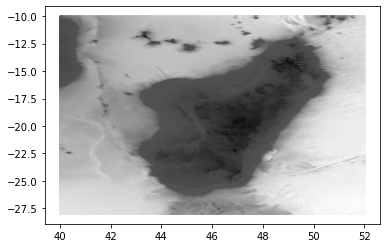

In [5]:
plt.scatter(x,y,s=1,c=color_map(z))

plt.savefig("result1.png",
            bbox_inches ="tight",
            pad_inches = 0)

plt.show()

### Completion Level 2: Colormap

In [6]:
def color_map(z):
    norm = mcolors.Normalize(vmin=np.min(z), vmax=np.max(z))
    cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', [(0, (0.38,0,0.70)), (0.80, 'orange'),(1, 'yellow')])
    color = cmap(norm(z))
    return color

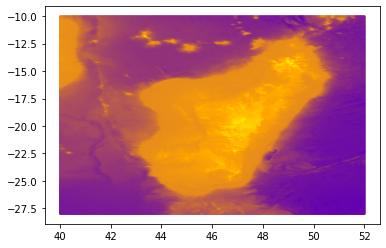

In [7]:
plt.scatter(x,y,s=1,c=color_map(z))

plt.savefig("result2.png",
            bbox_inches ="tight",
            pad_inches = 0)

plt.show()

In [8]:
def color_map(z):
    cdict = {'red':   [(0.0, 0.38, 0.38), # purple
                       (0.9, 1.0, 1.0), # orange
                       (1.0, 1.0, 1.0)], # yellow
             'green': [(0.0, 0.0, 0.0),
                       (0.9, 0.64, 0.64),
                       (1.0, 0.86, 0.86)],
             'blue':  [(0.0, 0.7, 0.7),
                       (0.9, 0.0, 0.0),
                       (1.0, 0.0, 0.0)]}
    cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, N=256)
    norm = mcolors.Normalize(vmin=np.min(z), vmax=np.max(z))
    color = cmap(norm(z))
    return color




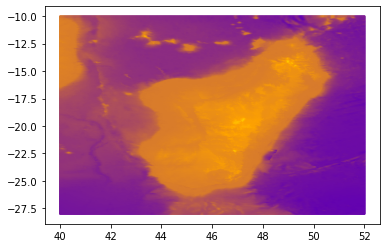

In [9]:
plt.scatter(x,y,s=1,c=color_map(z))

plt.savefig("result2.png",
            bbox_inches ="tight",
            pad_inches = 0)

plt.show()

### Completion Level 3: Divergent Color

In [10]:
def color_map(z):
    color = np.zeros((np.size(z),3))
    cdict_terrain = {'red':   [(0.0, 0.2, 0.2), # green
                       (0.3, 0.97, 0.97), # yellow
                       (0.7, 0.68, 0.68),#brown
                       (1.0, 0.87, 0.87)], # light brown
             'green': [(0.0, 0.86, 0.86),
                       (0.3, 0.97, 0.97),
                       (0.7, 0.58, 0.58),
                       (1.0, 0.83, 0.83)],
             'blue':  [(0.0, 0.51, 0.51),
                       (0.3, 0.65, 0.65),
                       (0.7, 0.47, 0.47),
                       (1.0, 0.82, 0.82)]}
    cmap_terrain = mcolors.LinearSegmentedColormap('terrain_colormap', cdict_terrain)
    cdict_sea = {'red':   [(0.0,0.22, 0.22), #dark blue
                       (1.0, 0.72, 0.72)], # light blue
             'green': [(0.0, 0.3, 0.3),
                       (1.0, 0.86, 0.86)],
             'blue':  [(0.0, 0.7, 0.7), 
                       (1.0, 0.96, 0.96)]} 
    cmap_sea = mcolors.LinearSegmentedColormap('sea_colormap', cdict_sea)
    
    #distingush the sea and 
    for i in range(len(z)):
        
        #set the sea level terrain
        if z[i]>-3900:
            #this the terrain
            color[i]=cmap_terrain((z[i]+3900) / (3900+np.max(z)))[:3]
        else:
            color[i]=cmap_sea((z[i] - np.min(z)) / (-3900 - np.min(z)))[:3]
            
            
   # color = np.where(z > 0, terrain_color, sea_color)
    
    return color


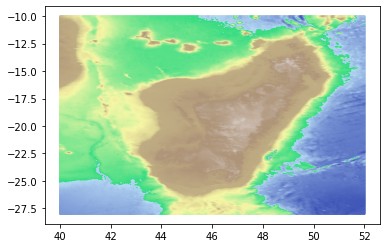

In [11]:
plt.scatter(x,y,s=1,c=color_map(z))

plt.savefig("result3.png",
            bbox_inches ="tight",
            pad_inches = 0)

plt.show()

### Interpolate HEX Values

In [12]:
def hex_interpolate(start_color, end_color, num_steps):
    start_rgb = mcolors.to_rgb(start_color)
    end_rgb = mcolors.to_rgb(end_color)
    r = np.linspace(start_rgb[0], end_rgb[0], num_steps)
    g = np.linspace(start_rgb[1], end_rgb[1], num_steps)
    b = np.linspace(start_rgb[2], end_rgb[2], num_steps)
    colors = []
    for i in range(num_steps):
        colors.append(mcolors.to_hex((r[i], g[i], b[i])))
    return colors

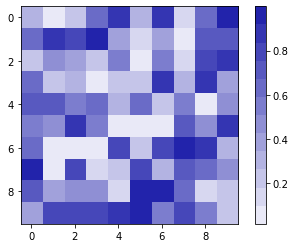

In [13]:
start_color = "#e9e9f7"  
end_color = "#2223ab"    # blue
num_steps = 12
colors = hex_interpolate(start_color, end_color, num_steps)
cmap = mcolors.ListedColormap(colors)

# Create a sample plot
data = np.random.rand(10, 10)
plt.imshow(data, cmap=cmap)
plt.colorbar()
plt.show()

### Gamma Correction

In [14]:
def linearize_rgb(rgb, gamma=2.2):
    
    # Convert RGB values to the range 0-1
    rgb_norm = [val / 255.0 for val in rgb]

    # Apply gamma correction
    gamma_corrected = [pow(val, gamma) for val in rgb_norm]

    # Convert back to the range 0-255
    linearized = [val * 255.0 for val in gamma_corrected]

    return linearized

In [15]:
# Define an RGB color in sRGB space
srgb_color = (21, 182, 222)

# Linearize the RGB color using gamma correction
linearized_color = linearize_rgb(srgb_color, gamma=2.2)

# Print the original and linearized colors
print("Original sRGB color:", srgb_color)
print("Linearized RGB color:", [int(val) for val in linearized_color])

Original sRGB color: (21, 182, 222)
Linearized RGB color: [1, 121, 187]
